**Importing Necessary Libraries**

In [ ]:
import tensorflow as tf # for building CNN architecture and training model
from google.colab.patches import cv2_imshow # visualisation
from tensorflow.keras import Model, Sequential, callbacks # for building CNN architecture and training model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout # for building CNN architecture and training model
from tensorflow.keras.losses import SparseCategoricalCrossentropy # to define loss
from tensorflow.keras.optimizers import Adam # to define optimizer
from PIL import Image, ImageOps #Image operations
import numpy as np # matrix manupulation
import pickle # loading saved arrays of training, validation and testing images
import os # file and folder manupulation
import cv2 # open-cv
import re # regex

**Building the CNN Architecture**

In [ ]:
license = Sequential() # sequential model

# ading convoution and maxpool layers
license.add(Conv2D(64, 3, padding='same', activation='relu', input_shape=(50,100,3)))
license.add(Conv2D(64, 3, padding='same', activation='relu'))
license.add(MaxPool2D((2,2), strides=(2,2), padding='same'))

license.add(Conv2D(128, 3, padding='same', activation='relu'))
license.add(Conv2D(128, 3, padding='same', activation='relu'))
license.add(MaxPool2D((2,2), strides=(1,1), padding='same'))

license.add(Conv2D(256, 3, padding='same', activation='relu'))
license.add(Conv2D(256, 3, padding='same', activation='relu'))
license.add(MaxPool2D((2,2), strides=(2,2), padding='same'))

license.add(Conv2D(512, 3, padding='same', activation='relu'))
license.add(MaxPool2D((2,2), strides=(1,1), padding='same'))
license.add(Conv2D(512, 3, padding='same', activation='relu'))
license.add(MaxPool2D((2,2), strides=(2,2), padding='same'))

license.add(Flatten())

license.add(Dense(1024, activation='relu'))
license.add(Dropout(0.5))
license.add(Dense(2048, activation='relu'))
license.add(Dropout(0.5, name='feature_vector'))

# defining 10 outputs for the 10 characters
output1 = Dense(26, name='first_character', activation='softmax')(license.output)

output2 = Dense(26, name='second_character', activation='softmax')(license.output)

output3 = Dense(10, name='third_character', activation='softmax')(license.output)

output4 = Dense(10, name='fourth_character', activation='softmax')(license.output)

output5 = Dense(26, name='five_character', activation='softmax')(license.output)

output6 = Dense(26, name='six_character', activation='softmax')(license.output)

output7 = Dense(10, name='seven_character', activation='softmax')(license.output)

output8 = Dense(10, name='eight_character', activation='softmax')(license.output)

output9 = Dense(10, name='nine_character', activation='softmax')(license.output)

output10 = Dense(10, name='ten_character', activation='softmax')(license.output)

In [ ]:
# model object
license = Model(inputs = license.input, outputs = [output1, output2, output3, output4, output5, output6, 
                                                   output7, output8, output9, output10])

In [ ]:
# defining losses for all the ten characters
loss1 = SparseCategoricalCrossentropy(from_logits=False)
loss2 = SparseCategoricalCrossentropy(from_logits=False)
loss3 = SparseCategoricalCrossentropy(from_logits=False)
loss4 = SparseCategoricalCrossentropy(from_logits=False)
loss5 = SparseCategoricalCrossentropy(from_logits=False)
loss6 = SparseCategoricalCrossentropy(from_logits=False)
loss7 = SparseCategoricalCrossentropy(from_logits=False)
loss8 = SparseCategoricalCrossentropy(from_logits=False)
loss9 = SparseCategoricalCrossentropy(from_logits=False)
loss10 = SparseCategoricalCrossentropy(from_logits=False)

In [ ]:
# creating a dictionary of losses to use while compiling the model
losses = {'first_character': loss1, 'second_character': loss2, 'third_character': loss3, 
          'fourth_character':loss4, 'five_character':loss5, 'six_character':loss6,
          'seven_character':loss7, 'eight_character':loss8, 'nine_character':loss9, 'ten_character':loss10}

In [ ]:
metrics = ['accuracy'] # metrics used is accuracy

In [ ]:
# compilation of the model using previously defined losses, optimiser as adam and metrics
license.compile(loss=losses, optimizer='adam', metrics=metrics)

In [ ]:
# loading the x_train array, x_train_label, x_val array and x_val label
# Pickling is convenient as the dataset containing numpy arrays is saved as a pickle file and can be loaded whenever necessary
 
dbfile = open('/content/drive/MyDrive/licensePlates/x_train.pkl', 'rb')     
x_train = pickle.load(dbfile)
dbfile.close()
dbfile = open('/content/drive/MyDrive/licensePlates/x_val.pkl', 'rb')     
x_val = pickle.load(dbfile)
dbfile.close()
dbfile = open('/content/drive/MyDrive/licensePlates/x_train_label.pkl', 'rb')     
label_dict = pickle.load(dbfile)
dbfile.close()
dbfile = open('/content/drive/MyDrive/licensePlates/x_val_label.pkl', 'rb')     
label_val = pickle.load(dbfile)
dbfile.close()

In [ ]:
# defining callbacks to save the model with the minimum validation loss

filepath = '/content/drive/MyDrive/licensePlates'
callback = callbacks.ModelCheckpoint(filepath=filepath,monitor='val_loss',
                                     mode='min',save_best_only=True)

In [ ]:
# fitting the model, make sure to train on GPU.
# batch size of 512 is used, and since the total number of training images were around 85,000, steps per epoch is 168

license.fit(x_train, y=label_dict, validation_data=(x_val,label_val), 
            epochs=15, batch_size=512, callbacks=[callback])

Epoch 1/15
168/168 [==============================] - 600s 3s/step - loss: 24.4646 - first_character_loss: 0.3856 - second_character_loss: 0.4626 - third_character_loss: 1.8292 - fourth_character_loss: 2.8231 - five_character_loss: 3.8949 - six_character_loss: 3.8304 - seven_character_loss: 2.6651 - eight_character_loss: 2.8228 - nine_character_loss: 2.8915 - ten_character_loss: 2.8595 - first_character_accuracy: 0.9637 - second_character_accuracy: 0.9517 - third_character_accuracy: 0.2848 - fourth_character_accuracy: 0.1118 - five_character_accuracy: 0.0377 - six_character_accuracy: 0.0389 - seven_character_accuracy: 0.1119 - eight_character_accuracy: 0.1014 - nine_character_accuracy: 0.0984 - ten_character_accuracy: 0.1003 - val_loss: 19.2813 - val_first_character_loss: 0.0047 - val_second_character_loss: 0.0048 - val_third_character_loss: 1.3401 - val_fourth_character_loss: 2.2940 - val_five_character_loss: 3.2630 - val_six_character_loss: 3.2604 - val_seven_character_loss: 2.2005 -

In [ ]:
# since the 15 epoch model was the best one we can save the model object or use the model saved by the callbacks which is
# again the 15 epoch one
tf.keras.models.save_model(license, '/content/drive/MyDrive/licensePlates/model.h5')

In [ ]:
# this way we can load the saved model
license_model = tf.keras.models.load_model('/content/drive/MyDrive/licensePlates/model.h5')

In [ ]:
# loading the test dataset which is a pickle file
dbfile = open('/content/drive/MyDrive/licensePlates/x_test.pkl', 'rb')     
x_test = pickle.load(dbfile)
dbfile.close()

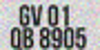

GV01QB8905


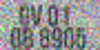

GV01OB8905


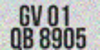

GV01QB8905


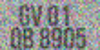

GV01QB8905


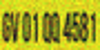

GV01QQ4581


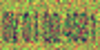

GV01QO4587


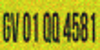

GV01QQ4581


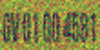

GV01QO4581


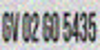

GV02GO5435


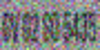

GV02GO5435


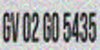

GV02GO5435


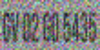

GV02GO5435


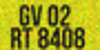

GV02RT8408


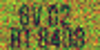

GV02RT8408


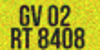

GV02RT8408


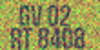

GV02RT8408


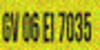

GV06EI7035


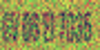

GV06EI7135


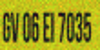

GV06EI7035


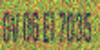

GV06EI7035


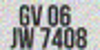

GV06JW7408


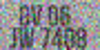

GV06JW7408


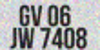

GV06JW7408


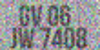

GV06JW7408


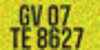

GV07TE8627


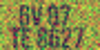

GV07TE8627


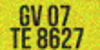

GV07TE8627


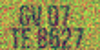

GV07TE8627


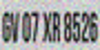

GV07XR8526


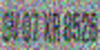

GV07XR8526


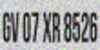

GV07XR8526


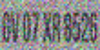

GV07XR8526


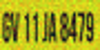

GV11JA8479


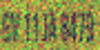

GV11JA8479


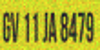

GV11JA8479


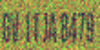

GV11JA8479


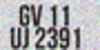

GV11UJ2391


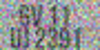

GV11UJ2391


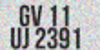

GV11UJ2391


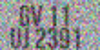

GV11UJ2391


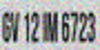

GV12IM6723


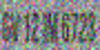

GV12HA6723


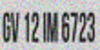

GV12IM6723


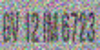

GV12BA6723


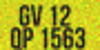

GV12QP1563


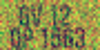

GV12QP1563


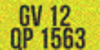

GV12QP1563


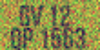

GV12QP1563


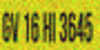

GV16HI3645


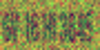

GV16HI3845


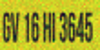

GV16HI3645


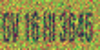

GV16HI3645


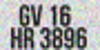

GV16HR3896


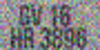

GV16HR3896


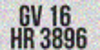

GV16HR3896


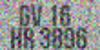

GV16HR3896


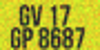

GV17GP8687


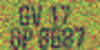

GV17GP8687


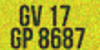

GV17GP8687


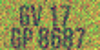

GV17GP8687


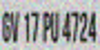

GV17PU4724


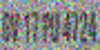

GV17PU4724


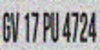

GV17PU4724


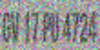

GV17PU4724


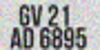

GV21AD6895


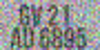

GV21AD6895


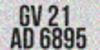

GV21AD6895


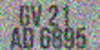

GV21AD6895


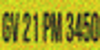

GV21PM3450


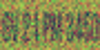

GV21PM2450


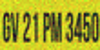

GV21PM3450


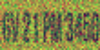

GV21PM3450


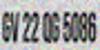

GV22QG5086


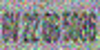

GV22QS5006


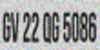

GV22QG5086


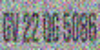

GV22QG5086


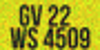

GV22WS4509


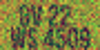

GV22WS4509


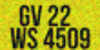

GV22WS4509


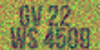

GV22WS4509


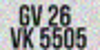

GV26VK5505


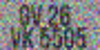

GV26VK5505


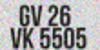

GV26VK5505


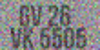

GV26VK5505


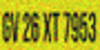

GV26XT7953


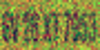

GV26XT7953


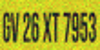

GV26XT7953


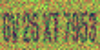

GV26XT7953


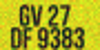

GV27DF9383


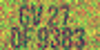

GV27DF9383


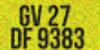

GV27DF9383


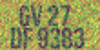

GV27DF9383


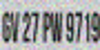

GV27PW9719


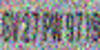

GV27PW9719


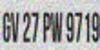

GV27PW9719


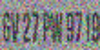

GV27PW9719


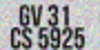

GV31CS5925


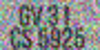

GV31CS6925


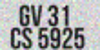

GV31CS5925


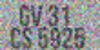

GV31CS5925


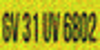

GV31UV6802


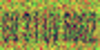

GV31UV6802


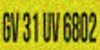

GV31UV6802


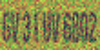

GV31UV6802


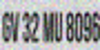

GV32MU8096


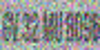

GV32MU8096


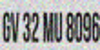

GV32MU8096


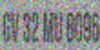

GV32MU8096


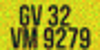

GV32VM9279


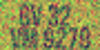

GV32VM9279


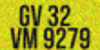

GV32VM9279


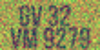

GV32VM9279


In [ ]:
# running the model on test dataset

char_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
               'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

num_labels = ['0', '1', '2', '3', '4', '5','6', '7', '8', '9']

for k in x_test:
    cv2_imshow(k)
    test = np.expand_dims(k, axis=0)
    pred = license_model.predict(test)
    plate = ''
    for i in range(10):
        if len(pred[i][0])<20:
            plate += num_labels[np.argmax(pred[i][0])]
        else:
            plate += char_labels[np.argmax(pred[i][0])]
    print(plate)

# we can see from the below results that even the degraded images have been captured properly with some inconsistencies between O and Q
# 1 and 7 when the images are very degraded.